# CW 1
## Introduction


## Task 1

## 1.1 Cleaning Data

### 1.1.1 
In the file climbing_statistics.csv, find the rows where both the date and route are identical, and write commands that aggregate their information as follows: (i) obtain the total number of Attempts and Successes for the same route and date; (ii) compute the percentage of successful attempts to summit for the same route and date. **Note: In most datasets, there will be faulty or incomplete data. If there are any rows with inconsistent data based on your computations above, eliminate them from your data set.**

First and foremost, we load the data as a dataframe, using pandas. To get a feel for the set, use the head method to see the first 5 datapoints.

In [1]:
import pandas as pd
import numpy as np

c_data = pd.read_csv("climbing_statistics.csv")
c_data.head()

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0


To motivate the aggregation, we can find entries that have the same date and routes. For example, Disappointment Cleaver on 9/9/2015. We also find some entries with more successes than attempts, and some data for unknown routes or variations on the spelling (Fuhrer's Finger vs. Fuhrers Finger).

In [2]:
c_data[(c_data["Route"] == "Disappointment Cleaver") & (c_data["Date"] == "9/9/2015")]

,Date,Route,Attempted,Succeeded,Success Percentage
70,9/9/2015,Disappointment Cleaver,2,2,1.000000
71,9/9/2015,Disappointment Cleaver,2,0,0.000000
72,9/9/2015,Disappointment Cleaver,12,10,0.833333


In [3]:
c_data[(c_data["Success Percentage"] > 1)]

,Date,Route,Attempted,Succeeded,Success Percentage
133,8/26/2015,Disappointment Cleaver,3,4,1.333333
191,8/21/2015,Disappointment Cleaver,1,2,2.000000
507,7/27/2015,Emmons-Winthrop,3,4,1.333333
589,7/20/2015,Disappointment Cleaver,5,71,14.200000
1156,6/23/2015,Disappointment Cleaver,2,5,2.500000
1399,6/12/2015,Disappointment Cleaver,10,11,1.100000
2709,7/24/2014,Disappointment Cleaver,7,8,1.142857
2970,7/11/2014,Kautz Glacier,11,12,1.090909
3010,7/10/2014,Disappointment Cleaver,3,4,1.333333
3196,7/3/2014,Disappointment Cleaver,1,2,2.000000


In [4]:
c_data.Route.unique()

array(['Disappointment Cleaver', 'Little Tahoma', 'Kautz Glacier',
       'Emmons-Winthrop', 'glacier only - no summit attempt',
       'Fuhrers Finger', 'Success Cleaver', 'Liberty RIngraham Directge',
       'Kautz Cleaver', 'Tahoma Glacier', 'Ptarmigan RIngraham Directge',
       'Mowich Face', 'Ingraham Direct', 'Sunset RIngraham Directge',
       'Curtis RIngraham Directge', 'Tahoma Cleaver', 'Gibralter Ledges',
       'Nisqually Glacier', 'Wilson Headwall', 'Gibralter Chute',
       "Fuhrer's Finger", 'Unknown', 'Edmonds HW', 'Sunset Amphitheater',
       'Kautz Headwall', 'Liberty Wall'], dtype=object)

We'll remove all inconsistent data, starting with removing any row with more successes than attempts. We'll then combine **Fuhrer's Finger** with **Fuhrers Finger**, and finally remove any **Unknown** route. One of the possible routes is **glacier only - no summit attempt**. I leave this is because although there is no summit attempt, if they successfully climb the glacier, and that is what they came to do, it should count as successful in its own category.


We can now aggregate all the entries that have the same date and route. Pandas allows us to use group rows based on a set of columns using the groupby aggregator. We can then immediately sum all the columns not used in the grouping, keeping in mind we're going to have to recalculate the success percentages. This is an easy manipulation, and is done here.

As a quick check, we look at the output for the Disappointment Cleaver on 9/9/2015 grouping and see it matches the sums of the previous three rows.

In [5]:
c_data = c_data[c_data["Success Percentage"] <= 1]
c_data.loc[c_data.Route == "Fuhrers Finger", "Route"] = "Fuhrer's Finger"
c_data = c_data[c_data["Route"] != "Unknown"]

c_data = c_data.groupby(["Date", "Route"]).sum().reset_index()
c_data["Success Percentage"] = c_data["Succeeded"]/c_data["Attempted"]
c_data[(c_data["Route"] == "Disappointment Cleaver") & (c_data["Date"] == "9/9/2015")]

,Date,Route,Attempted,Succeeded,Success Percentage
991,9/9/2015,Disappointment Cleaver,16,12,0.75


### 1.1.2
In the file Rainier_Weather.csv, delete all columns that do not contain any information about weather conditions on the given date.

Similarly to the climbing data, we first have a look at the data set. Quickly, we notice that there are 0 entries for the AVG daily wind speed, and looking further into the dataset find some for other columns as well. We also see that the column **Battery Voltage AVG** seems a bit out of place...

In [6]:
w_data = pd.read_csv("Rainier_Weather.csv")
w_data.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,12/31/2015,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,12/30/2015,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,12/29/2015,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,12/28/2015,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,12/27/2015,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708


As such, we remove any rows with 0s in them. This is because any incomplete information will skew the results. We also remove the **Battery voltage AVG** column. To remove the rows including 0s, we check that every value of a row is non-zero, and keep only those that satisfy that condition.

In [7]:
w_data = w_data.drop(columns="Battery Voltage AVG")
#Create a boolean dataframe, and check that all the columns are not equal to 0 to get a list of T/F...
w_data = w_data[(w_data[w_data.columns] != 0).all(axis=1)]
w_data.head()

,Date,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,12/31/2015,19.062917,21.870833,21.977792,62.325833,84.915292
1,12/30/2015,14.631208,18.493833,3.540542,121.505417,86.192833
29,12/2/2015,23.517917,64.870833,9.529833,275.591667,70.777208
30,12/1/2015,17.996250,88.892500,30.362083,302.920833,49.943667
31,11/30/2015,21.930833,49.672083,29.427375,283.183333,69.432250


### 1.1.3
Merge the two CSV files into one file containing all the above data by matching the dates such that each row contains a date and route and all the corresponding columns with the weather variables and the climbing statistics. The resulting merged file constitutes your data set for training.


In [8]:
training_set = pd.merge(c_data, w_data, how="inner")
training_set.to_csv(r"training_set.csv")
training_set.head()

,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,1/24/2015,Gibralter Ledges,4,0,0.0,35.250833,59.772917,18.048458,271.591667,3.093750
1,1/24/2015,Ingraham Direct,4,0,0.0,35.250833,59.772917,18.048458,271.591667,3.093750
2,10/13/2015,Little Tahoma,8,0,0.0,40.979583,28.335708,19.591167,279.779167,176.382667
3,10/15/2015,Disappointment Cleaver,2,0,0.0,46.447917,27.211250,17.163625,259.121375,138.387000
4,10/2/2015,Disappointment Cleaver,2,0,0.0,36.064167,47.017375,6.445917,247.318333,176.265542


## 1.2 Visualising Data
Before anything else, we're importing the training set, and making the Date field a datetime object to facilitate sorting, and graphing.

In [158]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

data = pd.read_csv("training_set.csv", index_col=0)
data["Date"] = pd.to_datetime(data["Date"])
data = data.sort_values("Date")

### 1.2.1
Plot the Success Percentage, Attempts and Successes as a function of time in three separate subplots. You will need to transform dates into a linear time variable for the x-axis of the plot.

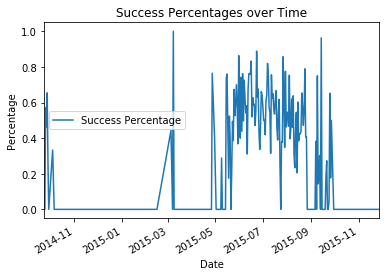

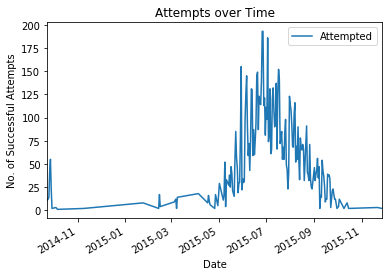

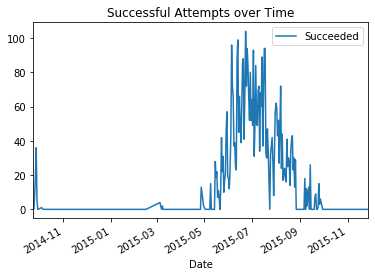

In [196]:
agg = data.groupby("Date").sum().reset_index()
agg["Success Percentage"] = agg["Succeeded"]/agg["Attempted"]

ax = agg.plot(x="Date", y="Success Percentage", title="Success Percentages over Time")
ax.set_ylabel("Percentage")

ax = agg.plot(x="Date", y="Attempted", title="Attempts over Time")
ax.set_ylabel("No. of Attempts")

agg.plot(x="Date", y="Succeeded", title="Successful Attempts over Time")
ax.set_ylabel("No. of Successful Attempts")

plt.show()

### 1.2.2

Plot all weather variables (except Wind Direction) over time in one diagram with two y-axes. The y-axis on the left of the diagram should contain data for Temperature and Wind Speed Daily, the y-axis on the right of the diagram should contain Relative Humidity and Solar Radiation. Plot the time-series in different colours and place a legend to the right of the diagram.

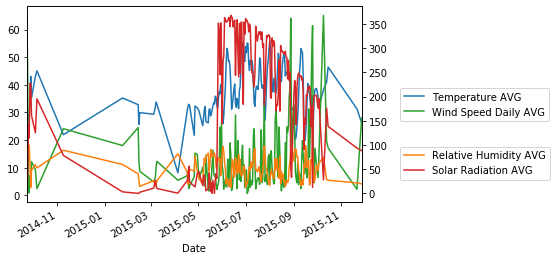

In [11]:
conditions = data.drop_duplicates(subset=["Date"], keep="first")
conditions = conditions.drop(columns=["Route","Attempted","Succeeded","Success Percentage","Wind Direction AVG"])

ax = conditions.plot(x="Date", secondary_y=["Relative Humidity AVG", "Solar Radiation AVG"])
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.right_ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.2))

plt.show()

### 1.2.3
Plot all five weather variables as histograms (50 bins) in one diagram, assigning a different colour to each distribution. Specify two x-axes: the x-axis at the bottom should correspond to Temperature, Relative Humidity, and Wind Speed Daily (range from -5 to 100); the x-axis at the top should correspond to Wind Direction and Solar Radiation (range from 0 to 375)

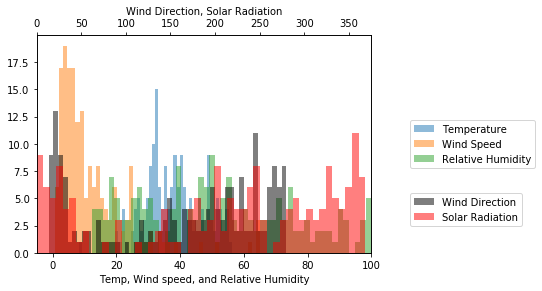

In [12]:
conditions = data.drop_duplicates(subset=["Date"], keep="first")
w_vars = ["Temperature AVG", "Relative Humidity AVG", "Wind Speed Daily AVG", "Wind Direction AVG", "Solar Radiation AVG"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-5,100)
ax.hist(conditions["Temperature AVG"], label="Temperature", alpha=0.5, bins=50)
ax.hist(conditions["Wind Speed Daily AVG"], label="Wind Speed", alpha=0.5,bins=50)
ax.hist(conditions["Relative Humidity AVG"], label="Relative Humidity", alpha=0.5,bins=50)
ax.set_xlabel("Temp, Wind speed, and Relative Humidity")
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

ax2 = ax.twiny()
ax2.set_xlim(0,375)
ax2.hist(conditions["Wind Direction AVG"], label="Wind Direction", alpha=0.5,bins=50, color="black")
ax2.hist(conditions["Solar Radiation AVG"], label="Solar Radiation", alpha=0.5,bins=50, color="red")
ax2.set_xlabel("Wind Direction, Solar Radiation")
ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.2))

plt.show()

## 1.3 Visualising Relationships Between Descriptors
Write a function that shows 5x5 scatter plots of the five weather variables against each other. Comment on any observable relationships between variables and the possible impact on any regression task.

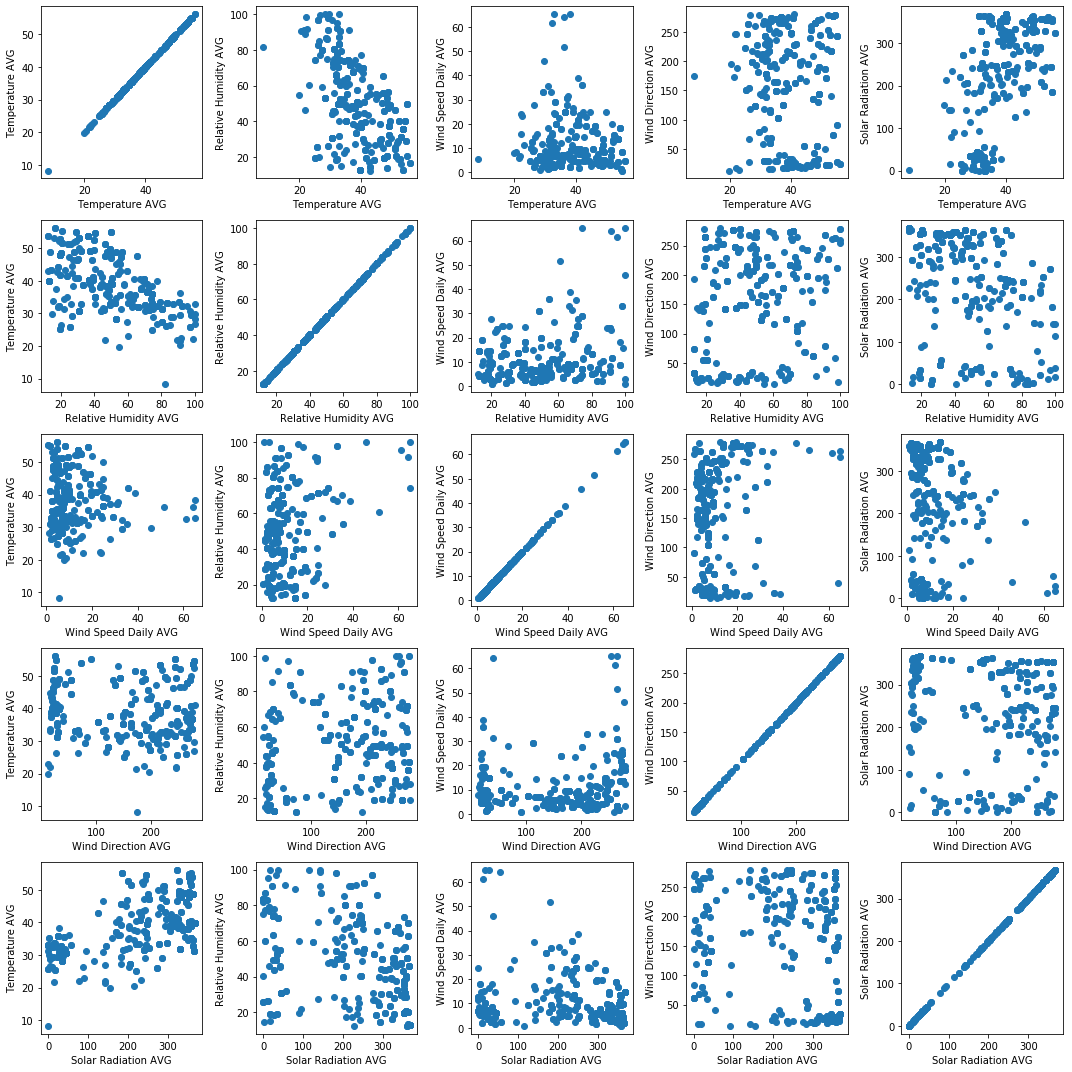

In [13]:
fig, ax = plt.subplots(5,5, figsize=(15,15))
for i,row in enumerate(ax):
    for j,subplot in enumerate(row):
        subplot.scatter(data[w_vars[i]], data[w_vars[j]])
        subplot.set_ylabel(w_vars[j])
        subplot.set_xlabel(w_vars[i])
plt.tight_layout()
plt.show()

* See figures (1,2) and (2,1) - It seems like (apart from an outlying point at a very low temperature) there exists a correlation between temperature and humidity. For higher humidities, temperatures seem to be lower.
* (5,1) and (1,5) imply a correlation between Solar Radiation and Temperature. 

Most of the other variables seem uncorrelated. The two correlations seen above (Temperature and humidity; temperature and solar radiation) don't seem strong enough to impact any regression we're going to do.

## 1.4 Splitting Training and Validation Sets
Although in this coursework we will not use T-fold cross-validation in the standard
form, it is important to know how to split the data into training and validation sets.
Write a function that randomly divides the data set into a ‘training’ set with 80% of the rows, and a ‘validation’ set with the remaining 20%. Make sure that the training and validation sets have similar values for the Success Percentage.

Here, to make the validation set, I sample the training set for 20% of the rows in it, and drop them from the training set. I check to see if the success percentage mean is within 2% (a bit arbitrarily, i admit...) in the validation and training sets, otherwise repeat with a different sample until it is.

In [206]:
training_set = data

diff = 1
while diff > 0.02:
    validation_set = training_set.sample(frac=0.2)
    temp_set = training_set.drop(validation_set.index)
    temp_succ = temp_set.mean()["Success Percentage"]
    val_succ = validation_set.mean()["Success Percentage"]
    diff = abs(temp_succ - val_succ)

training_set = temp_set

# 2 Comparing Regression and Classification Algorithms

## 2.1 Regression

### 2.1.1 Linear
Using the cleaned and merged data prepared in Task 1, obtain a linear regression model to predict the ‘Success Percentage’ using the four weather features ‘Temperature’, ‘Relative Humidity’, ‘Wind Speed Daily’ and ‘Solar Radiation’ as predictors.

Report the parameters of the model and the in-sample error from the training set. Apply the model to the validation data to predict the ‘Success Percentage’ and compute the out-of-sample error from this vallidation set and compare with the in-sample error.

Test the model on out-of-sample data by predicting the ‘Success Percentage’ for the weather conditions from 28-31 December 2018 available as a CSV file on Blackboard (this is the test set).

In the cell below, we train our model using the cleaned up data from part 1, and print the parameters:

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

attributes = ["Temperature AVG", "Relative Humidity AVG", "Wind Speed Daily AVG", "Solar Radiation AVG"]

X_train = training_set[attributes]
Y_train = training_set["Success Percentage"]

lin_reg = LinearRegression()  
lin_reg.fit(X_train, Y_train)

params = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
params

,Coefficient
Temperature AVG,-0.000859
Relative Humidity AVG,0.000643
Wind Speed Daily AVG,-0.002091
Solar Radiation AVG,0.001296


Now, we look at sample errors for the training sample

In [208]:
X_val = validation_set[attributes]
Y_val = validation_set["Success Percentage"]

def compute_errors(regressor, X_train, Y_train, X_val, Y_val):
    
    Y_train_pred = regressor.predict(X_train)
    training_error_mse = metrics.mean_squared_error(Y_train, Y_train_pred)
    training_error_mae = metrics.mean_absolute_error(Y_train, Y_train_pred)

    print("Mean Squared Error for training set: ", training_error_mse)
    print("Mean Absolute Error for training set: ", training_error_mae)

    Y_val_pred = regressor.predict(X_val)
    validation_error_mse = metrics.mean_squared_error(Y_val, Y_val_pred)
    validation_error_mae = metrics.mean_absolute_error(Y_val, Y_val_pred)

    print("Mean Squared Error for validation set: ", validation_error_mse)
    print("Mean Absolute Error for validation set: ", validation_error_mae)
    print("Difference between the in-sample MSE and out-of-sample MSE: ", abs(validation_error_mse - training_error_mse))
    print("Difference between the in-sample MAE and out-of-sample MAE: ", abs(validation_error_mae - training_error_mae))


compute_errors(lin_reg, X_train, Y_train, X_val, Y_val)

Mean Squared Error for training set:  0.11922185425818844
Mean Absolute Error for training set:  0.28974125871134526
Mean Squared Error for validation set:  0.10922824293013926
Mean Absolute Error for validation set:  0.27989520774486126
Difference between the in-sample MSE and out-of-sample MSE:  0.009993611328049185
Difference between the in-sample MAE and out-of-sample MAE:  0.009846050966483999


We see that both the MSE and MAE are very close for both in-sample and out-of-sample. Looking at the Mean Absolute Error, we see that the predicted values are, on average, within nearly 0.2% of the actual success percentages.

Next, we try applying our model to the test set for the weather conditions from 28-31 December 2018. We can use the attributes to predict success percentages, and just add a column to the end of our dataframe:

In [209]:
def predict_test_set(regressor):
    test_set = pd.read_csv("test_set.csv")
    X_test = test_set[test_set.columns[1:]]
    succ_pred = regressor.predict(X_test)
    test_set["Success Percentage"] = succ_pred
    return test_set

predict_test_set(lin_reg)

,Date,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Solar Radiation AVG,Success Percentage
0,12/31/2018,24.062910,58.87083,17.977790,121.91529,0.258107
1,12/30/2018,44.631200,53.49383,13.540541,191.19283,0.336032
2,12/29/2018,22.614291,60.07291,10.451290,157.10091,0.321463
3,12/28/2018,31.687041,70.55791,9.876980,176.24120,0.346411


### 2.1.2 Ridge Regression

Repeat the above task for Ridge Regression models. You will need to scan the penalty parameter of the Ridge models and establish the optimal value of the penalty for this dataset by examining the error on the validation set.

Explain your results using plots, code, and the effect of the parameter of in- sample and out-of-sample errors.

Alpha minimising MSE:  1e-25


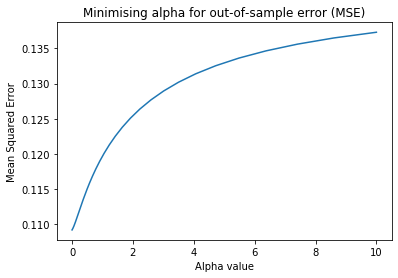

In [210]:
from sklearn.linear_model import Ridge, RidgeCV

#Using the same training and validations sets

alphas = np.logspace(-25, 1, 400)
MSEs = []
ridge_reg = Ridge(normalize = True)

for a in alphas:
    ridge_reg.set_params(alpha = a)
    ridge_reg.fit(X_train, Y_train)
    Y_pred = ridge_reg.predict(X_val)
    mse = metrics.mean_squared_error(Y_val, Y_pred)
    MSEs.append(mse)

min_MSE_index = MSEs.index(min(MSEs))
min_alpha = alphas[min_MSE_index]
print("Alpha minimising MSE: ", min_alpha)

plt.plot(alphas, MSEs)
plt.title("Minimising alpha for out-of-sample error (MSE)")
plt.ylabel("Mean Squared Error")
plt.xlabel("Alpha value")
plt.show()

In [211]:
ridge_reg.set_params(alpha = min_alpha)
ridge_reg.fit(X_train, Y_train)

compute_errors(ridge_reg, X_train, Y_train, X_val, Y_val)
predict_test_set(ridge_reg)

Mean Squared Error for training set:  0.11922185425818844
Mean Absolute Error for training set:  0.28974125871134526
Mean Squared Error for validation set:  0.10922824293013927
Mean Absolute Error for validation set:  0.2798952077448613
Difference between the in-sample MSE and out-of-sample MSE:  0.00999361132804917
Difference between the in-sample MAE and out-of-sample MAE:  0.009846050966483944


,Date,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Solar Radiation AVG,Success Percentage
0,12/31/2018,24.062910,58.87083,17.977790,121.91529,0.258107
1,12/30/2018,44.631200,53.49383,13.540541,191.19283,0.336032
2,12/29/2018,22.614291,60.07291,10.451290,157.10091,0.321463
3,12/28/2018,31.687041,70.55791,9.876980,176.24120,0.346411


# TODO: EXPLAIN RESULTS

## 2.2 Classification
### 2.2.1 Preparation of the data as categorical variables
To solve the classification tasks you need to unfold your data so that each row contains a sucess variable that is binary, i.e., ‘success=1’ or ‘failure=0’ for each attempt. Use the functionalities in Python to create from the data provided an expanded table of climbs with date and weather descriptors as in the original table, but a binary outcome variable of success.

In [256]:
newset = pd.DataFrame()

for _, row in data.iterrows():
    attempts = int(row["Attempted"])
    successes = int(row["Succeeded"])
    new_row = row.copy()
    
    new_row["Success"] = 1
    if successes > 0:
        newset = newset.append([new_row]*successes, ignore_index=True)
        
    new_row["Success"] = 0
    if (attempts-successes) > 0:
        newset = newset.append([new_row]*(attempts-successes), ignore_index=True)
        
newset.drop(["Attempted", "Succeeded", "Success Percentage"], axis=1, inplace=True)
newset

,Date,Route,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG,Success
0,2014-09-23,Disappointment Cleaver,32.857333,100.000000,65.110667,254.273333,16.593800,0
1,2014-09-23,Disappointment Cleaver,32.857333,100.000000,65.110667,254.273333,16.593800,0
2,2014-09-23,Disappointment Cleaver,32.857333,100.000000,65.110667,254.273333,16.593800,0
3,2014-09-23,Disappointment Cleaver,32.857333,100.000000,65.110667,254.273333,16.593800,0
4,2014-09-23,Disappointment Cleaver,32.857333,100.000000,65.110667,254.273333,16.593800,0
...,...,...,...,...,...,...,...,...
9816,2015-11-21,Disappointment Cleaver,31.300000,21.690708,2.245833,117.549667,93.660417,0
9817,2015-11-21,Disappointment Cleaver,31.300000,21.690708,2.245833,117.549667,93.660417,0
9818,2015-11-21,Disappointment Cleaver,31.300000,21.690708,2.245833,117.549667,93.660417,0
9819,2015-11-27,Disappointment Cleaver,26.321667,19.715000,27.839583,68.004167,88.496250,0


### 2.2.2 Logistic regression (10 marks)
Train a logistic regression classifier on the training data with the same four weather conditions as features and the binary success of summiting Mount Rainier as the output.
After the classifier is trained, estimate the probability to successfully summit on the validation data. Compare the errors in the training data and validation data using different metrics.

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

attributes = ["Temperature AVG", "Relative Humidity AVG", "Wind Speed Daily AVG", "Solar Radiation AVG"]
X_train, X_test, Y_train, Y_test = train_test_split(newset[attributes], newset["Success"], test_size=0.2) 

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [273]:
print(logreg.score(X_test, Y_test))

test_set = pd.read_csv("test_set.csv")
X_test = test_set[test_set.columns[1:]]
succ_pred = logreg.predict(X_test)
test_set["Success"] = succ_pred
test_set.head(10)


0.6066157760814249


,Date,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Solar Radiation AVG,Success
0,12/31/2018,24.062910,58.87083,17.977790,121.91529,0
1,12/30/2018,44.631200,53.49383,13.540541,191.19283,0
2,12/29/2018,22.614291,60.07291,10.451290,157.10091,0
3,12/28/2018,31.687041,70.55791,9.876980,176.24120,0
